In [41]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

Working on Series

In [10]:
object = Series([5,10,15,20])
print("Direct Printing of Series \n"+str(object))
print("Printing of Series with values \n"+str(object.values))
print("Printing of Series with index \n"+str(object.index))

Direct Printing of Series 
0     5
1    10
2    15
3    20
dtype: int64
Printing of Series with values 
[ 5 10 15 20]
Printing of Series with index 
RangeIndex(start=0, stop=4, step=1)


Using Numpy Arrays to Series

In [8]:
data_array = np.array(['a','b','c'])
s = Series(data_array)
print("Conversion of Array into Series : \n"+str(s))

#custom indexing
s = Series(data_array,index=[100,101,102])
print("Series with Custom Index : \n"+str(s))

#using real life ex
revenue = Series([20,80,40,35],index=['ola','uber','grab','gojek'])
print(revenue)
print("Finding Revenue of Ola from above series with index as ola :"+str(revenue['ola']))

print("Finding values which has Revenue greater than equal to 35 :\n"+str(revenue[revenue>=35]))

#use boolean conditions
print("Boolean Condition if 'lyft' present in Series : "+str('lyft' in revenue))

#nan values
index_2 = ['ola','uber','grab','gojek','lyft']
revenue2 = Series(revenue,index_2)
print("Indexing and assigning NaN value for extra index "+str(revenue2))


#isnull and notnull
print("Checking is series contains any null values :\n"+str(pd.isnull(revenue2)))
print("Checking is series contains any notnull values :\n"+str(pd.notnull(revenue2)))

#addition of series (+)
print("Addition of Both Series is :\n"+str(revenue+revenue2))

#assigning names
revenue2.name="Company Revenues"
revenue2.index.name="Comapany Name"
print("Assigning Series after name and index name \n"+str(revenue2))

revenue_dict = revenue.to_dict()
print("Conversion of Series into Dictionary :\n"+str(revenue_dict))

Conversion of Array into Series : 
0    a
1    b
2    c
dtype: object
Series with Custom Index : 
100    a
101    b
102    c
dtype: object
ola      20
uber     80
grab     40
gojek    35
dtype: int64
Finding Revenue of Ola from above series with index as ola :20
Finding values which has Revenue greater than equal to 35 :
uber     80
grab     40
gojek    35
dtype: int64
Boolean Condition if 'lyft' present in Series : False
Indexing and assigning NaN value for extra index ola      20.0
uber     80.0
grab     40.0
gojek    35.0
lyft      NaN
dtype: float64
Checking is series contains any null values :
ola      False
uber     False
grab     False
gojek    False
lyft      True
dtype: bool
Checking is series contains any notnull values :
ola       True
uber      True
grab      True
gojek     True
lyft     False
dtype: bool
Addition of Both Series is :
gojek     70.0
grab      80.0
lyft       NaN
ola       40.0
uber     160.0
dtype: float64
Assigning Series after name and index name 
Comapany

DataFramesfor read from clipboard

In [ ]:
#example - Revenue of companies

revenue_df = pd.read_clipboard()
print(revenue_df)

#index and columns
print revenue_df.columns
print revenue_df['Rank ']
# #multiple columns

print DataFrame(revenue_df,columns=['Rank ','Name ','Industry '])

#Nan Values
revenue_df2 = DataFrame(revenue_df,columns=['Rank ','Name ','Industry ','Profit'])
print revenue_df2

#head and tail
print revenue_df.head(2)
print revenue_df.tail(2)

#access rows in df
print revenue_df.ix[0] #row 1
print revenue_df.ix[5] #row 6

#assign values to df
#numpy

array1 = np.array([1,2,3,4,5,6])
revenue_df2['Profit'] = array1
print revenue_df2

#series
profits = Series([900,1000],index=[3,5])
revenue_df2['Profit'] = profits

print revenue_df2

#deletion
del revenue_df2['Profit']
print revenue_df2



Dictonary function to Dataframe 

In [3]:
#dictionary function to dataframe
sample = {
     'Name':['Vijender','Barrett'],
     'Salary':['$100000','$50000']
}
#
print(sample)
#
sample_df = DataFrame(sample)
print(sample_df)

{'Name': ['Vijender', 'Barrett'], 'Salary': ['$100000', '$50000']}
       Name   Salary
0  Vijender  $100000
1   Barrett   $50000


Index-Objects

In [7]:
series1 = Series([10,20,30,40],index=['a','b','c','d'])

index1 = series1.index
print(index1)

print(index1[2:])

#negative indexes
print(index1[-2:])
print(index1[:-2])

print(index1[2:4])

#interesting
#index1[0] = 'e' #TypeError: Index does not support mutable operations

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['c', 'd'], dtype='object')
Index(['c', 'd'], dtype='object')
Index(['a', 'b'], dtype='object')
Index(['c', 'd'], dtype='object')


In [ ]:
Reindexing in pandas

In [46]:
#create new series series1

cars = Series(['Audi','Merc','BMW'],index=[1,2,3])
print("Default Series : \n"+str(cars))

#creating new indexes using reindex
cars = cars.reindex([1,2,3,4])
print("use of reindex in default Series : \n"+str(cars))

#using fillvalue
cars = cars.reindex([1,2,3,4,5],fill_value='Honda')
print("use of fillvalue in Series : \n"+str(cars))

#using reindex methods => ffill
ranger = range(8)
print(ranger)

cars = cars.reindex(ranger,method="ffill") #forward fill
print("use of ffill in default Series : \n"+str(cars))

Default Series : 
1    Audi
2    Merc
3     BMW
dtype: object
use of reindex in default Series : 
1    Audi
2    Merc
3     BMW
4     NaN
dtype: object
use of fillvalue in Series : 
1     Audi
2     Merc
3      BMW
4      NaN
5    Honda
dtype: object
range(0, 8)
use of ffill in default Series : 
0      NaN
1     Audi
2     Merc
3      BMW
4      NaN
5    Honda
6    Honda
7    Honda
dtype: object


In [71]:
#create new dataframe using randn
df_1 = DataFrame((abs(randn(25))*100).reshape(5,5),index=['a','b','c','d','e'], columns=['c1','c2','c3','c4','c5'])
print("Default DataFrame \n"+str(df_1))

#reindex rows of dataframe
df_2 = df_1.reindex(['a','b','c','d','e','f'])
print("\n Reindexed Rows \n"+str(df_2))

# #reindex columns of dataframe
df_3 = df_2.reindex(columns=['c1','c2','c3','c4','c5','c6'])
print("\n Reindexed Columns \n"+str(df_3))

# #using .ix[] to reindex
df_4 = df_1.ix[['a','b','c','d','e','f'],['c1','c2','c3','c4','c5','c6']]
print("\n Reindexed Both Rows and Columns using ix function \n"+str(df_4))

Default DataFrame 
           c1          c2          c3          c4          c5
a   41.095337  133.441319   62.134812   80.562443  121.430050
b    8.023766   64.395923    3.391770  120.205646   14.728023
c    1.632736  196.337225   25.033773   35.914363   58.409063
d  156.937274   39.252035   56.795006  114.272086   10.742794
e    5.056198   92.753776  166.597537   68.598152  245.490350

 Reindexed Rows 
           c1          c2          c3          c4          c5
a   41.095337  133.441319   62.134812   80.562443  121.430050
b    8.023766   64.395923    3.391770  120.205646   14.728023
c    1.632736  196.337225   25.033773   35.914363   58.409063
d  156.937274   39.252035   56.795006  114.272086   10.742794
e    5.056198   92.753776  166.597537   68.598152  245.490350
f         NaN         NaN         NaN         NaN         NaN

 Reindexed Columns 
           c1          c2          c3          c4          c5  c6
a   41.095337  133.441319   62.134812   80.562443  121.430050 NaN
b   

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [ ]:
Drop Entries

In [77]:
cars = Series(['Audi','Merc','BMW'],index=[1,2,3])
cars = cars.drop(1)
print("After Drop function to delete Audi \n"+str(cars))

#dataframes
cars_df = DataFrame(np.arange(9).reshape(3,3),index=['BMW','Audi','Merc'],columns=['rev','pro','exp'])
print("\nDataFrame as \n"+str(cars_df))

cars_df = cars_df.drop('BMW',axis=0)
print("\n After dropping 'BMW' value from dataframe \n"+str(cars_df))

cars_df = cars_df.drop('pro',axis=1)
print("\n After dropping by 'pro' index from dataframe \n"+str(cars_df))

After Drop function to delete Audi 
2    Merc
3     BMW
dtype: object

DataFrame as 
      rev  pro  exp
BMW     0    1    2
Audi    3    4    5
Merc    6    7    8

 After dropping 'BMW' value from dataframe 
      rev  pro  exp
Audi    3    4    5
Merc    6    7    8

 After dropping by 'pro' index from dataframe 
      rev  exp
Audi    3    5
Merc    6    8


In [82]:
Handling Null Data in Series

SyntaxError: invalid syntax (<ipython-input-82-6f166dc65afe>, line 1)

In [83]:
series1 = Series(['A','B','C','D',np.nan])
print("Default Series as \n"+str(series1))

#validate
print("\n Check for isnull in Series \n"+str(series1.isnull()))
print("\n Check after dropna in Series \n"+str(series1.dropna()))



Default Series as 
0      A
1      B
2      C
3      D
4    NaN
dtype: object

 Check for isnull in Series 
0    False
1    False
2    False
3    False
4     True
dtype: bool

 Check after dropna in Series 
0    A
1    B
2    C
3    D
dtype: object


Handling Null Data in DataFrame

In [91]:
df1 = DataFrame([[1,2,3],[5,6,np.nan],[7,np.nan,10],[np.nan,np.nan,np.nan]])
print("Default DataFrame is \n"+str(df1))

print("\n DataFrame after dropping na \n"+str(df1.dropna()))
print("\n DataFrame after dropping where all values as na \n"+str(df1.dropna(how='all')))

#column wise drop6,
print("\n DataFrame after dropping na column wise \n"+str(df1.dropna(axis=1)))

df2 = DataFrame([[1,2,3,np.nan],[4,5,6,7],[8,9,np.nan,np.nan],[12,np.nan,np.nan,np.nan]])
print("\n New Dataframe as \n"+str(df2))

print("\n DataFrame after dropping na with threshold=3 \n"+str(df2.dropna(thresh=3)))
print("\n DataFrame after dropping na with threshold=2 \n"+str(df2.dropna(thresh=2)))

#fillna
print("\n DataFrame after fillna with one value \n"+str(df2.fillna(0)))
print("\n DataFrame after fillna with all values\n"+str(df2.fillna({0:0,1:50,2:100,3:200})))


Default DataFrame is 
     0    1     2
0  1.0  2.0   3.0
1  5.0  6.0   NaN
2  7.0  NaN  10.0
3  NaN  NaN   NaN

 DataFrame after dropping na 
     0    1    2
0  1.0  2.0  3.0

 DataFrame after dropping where all values as na 
     0    1     2
0  1.0  2.0   3.0
1  5.0  6.0   NaN
2  7.0  NaN  10.0

 DataFrame after dropping na column wise 
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 New Dataframe as 
    0    1    2    3
0   1  2.0  3.0  NaN
1   4  5.0  6.0  7.0
2   8  9.0  NaN  NaN
3  12  NaN  NaN  NaN

 DataFrame after dropping na with threshold=3 
   0    1    2    3
0  1  2.0  3.0  NaN
1  4  5.0  6.0  7.0

 DataFrame after dropping na with threshold=2 
   0    1    2    3
0  1  2.0  3.0  NaN
1  4  5.0  6.0  7.0
2  8  9.0  NaN  NaN

 DataFrame after fillna with one value 
    0    1    2    3
0   1  2.0  3.0  0.0
1   4  5.0  6.0  7.0
2   8  9.0  0.0  0.0
3  12  0.0  0.0  0.0

 DataFrame after fillna with all values
    0     1      2      3
0   1   2.0    3.0  200.0
1   4   5

In [ ]:
Selecting Moditying Entires

In [92]:
series1 = Series([100,200,300],index=['A','B','C'])
print("Default Series is \n"+str(series1))

print(series1['A'])
print(series1[['A','B']])

#number indexes
print(series1[0])
print(series1[0:2])

#conditional indexes
print(series1[series1>150])
print(series1[series1==300])

#using df and accesing
df1 = DataFrame(np.arange(9).reshape(3,3),index=['car','bike','cycle'],columns=['A','B','C'])
print("\n Default DataFrame \n"+str(df1))

print(df1['A'])
print(df1[['A','B']])

print("\n Dataframe with value>5 \n"+str(df1>5))

#ix function access
print(df1.ix['bike'])
print(df1.ix[1])

Default Series is 
A    100
B    200
C    300
dtype: int64
100
A    100
B    200
dtype: int64
100
A    100
B    200
dtype: int64
B    200
C    300
dtype: int64
C    300
dtype: int64

 Default DataFrame 
       A  B  C
car    0  1  2
bike   3  4  5
cycle  6  7  8
car      0
bike     3
cycle    6
Name: A, dtype: int64
       A  B
car    0  1
bike   3  4
cycle  6  7
Dataframe with value>5 
           A      B      C
car    False  False  False
bike   False  False  False
cycle   True   True   True
A    3
B    4
C    5
Name: bike, dtype: int64
A    3
B    4
C    5
Name: bike, dtype: int64


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [ ]:
Data Alignment

In [93]:
ser_a = Series([100,200,300],index=['a','b','c'])
ser_b = Series([300,400,500,600],index=['a','b','c','d'])

#sum of series
print("Sum of series\n"+str(ser_a+ser_b))

#dataframe
df1 = DataFrame(np.arange(4).reshape(2,2),columns=['a','b'],index=['car','bike'])
print(df1)
df2 = DataFrame(np.arange(9).reshape(3,3),columns=['a','b','c'],index=['car','bike','cycle'])
print(df2)
print(df1+df2)

#important
df1 = df1.add(df2,fill_value=0)
print(df1)

ser_c = df2.ix[0]
print(df2 - ser_c)


Sum of series
a    400.0
b    600.0
c    800.0
d      NaN
dtype: float64
      a  b
car   0  1
bike  2  3
       a  b  c
car    0  1  2
bike   3  4  5
cycle  6  7  8
         a    b   c
bike   5.0  7.0 NaN
car    0.0  2.0 NaN
cycle  NaN  NaN NaN
         a    b    c
bike   5.0  7.0  5.0
car    0.0  2.0  2.0
cycle  6.0  7.0  8.0
       a  b  c
car    0  0  0
bike   3  3  3
cycle  6  6  6


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [ ]:
Ranking Sorting

In [94]:
ser1 =Series([500,1000,1500],index=['a','c','b'])
print(ser1)
#sorting by index
print(ser1.sort_index())

#sort by values
print(ser1.sort_values())

print(ser1.rank())

a     500
c    1000
b    1500
dtype: int64
a     500
b    1500
c    1000
dtype: int64
a     500
c    1000
b    1500
dtype: int64
a    1.0
c    2.0
b    3.0
dtype: float64


In [ ]:
Pandas Statistical

Default DataFrame 
      A     B     C
1  10.0   NaN  20.0
2  30.0  40.0   NaN

 Sum along each column 
A    40.0
B    40.0
C    20.0
dtype: float64

 Sum along indexes 
1    30.0
2    70.0
dtype: float64

 Min in dataframe in column wise
A    10.0
B    40.0
C    20.0
dtype: float64

 Max in dataframe in column wise
A    30.0
B    40.0
C    20.0
dtype: float64

 Max in dataframe with idxmax
A    2
B    2
C    1
dtype: int64

 Dataframe with cumsum
      A     B     C
1  10.0   NaN  20.0
2  40.0  40.0   NaN

 Dataframe with Describe function
               A     B     C
count   2.000000   1.0   1.0
mean   20.000000  40.0  20.0
std    14.142136   NaN   NaN
min    10.000000  40.0  20.0
25%    15.000000  40.0  20.0
50%    20.000000  40.0  20.0
75%    25.000000  40.0  20.0
max    30.000000  40.0  20.0

 Outputing unique values in list ['a' 'b' 'c' 'd']

 Outputing count of unique values in list a    3
c    3
b    2
d    1
dtype: int64

 Default Dataframe 
          A         B         C
1  

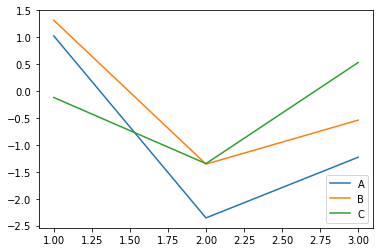

In [123]:
array1 = np.array([[10,np.nan,20],[30,40,np.nan]])
#print(array1)
df1 = DataFrame(array1,index=[1,2],columns=list('ABC'))
print("Default DataFrame \n"+str(df1))

#sum()
print("\n Sum along each column \n"+str(df1.sum()))
print("\n Sum along indexes \n"+str(df1.sum(axis=1)))

print("\n Min in dataframe in column wise\n"+str(df1.min()))
print("\n Max in dataframe in column wise\n"+str(df1.max()))

#idxmax : Return index of first occurrence of maximum over requested axis. NA/null values are excluded
print("\n Max in dataframe with idxmax\n"+str(df1.idxmax()))

#cumsum : Return cumulative sum over a DataFrame or Series axis
print("\n Dataframe with cumsum\n"+str(df1.cumsum()))


print("\n Dataframe with Describe function\n"+str(df1.describe()))


Unique Values in Series and count of unique

In [127]:
ser1 = Series(list('abcccaabd'))
print("Outputing unique values in list : "+str(ser1.unique()))
print("\nOutputing count of unique values in list \n"+str(ser1.value_counts()))

Outputing unique values in list : ['a' 'b' 'c' 'd']

Outputing count of unique values in list 
a    3
c    3
b    2
d    1
dtype: int64


Statiscal Ploting DataFrame


 Default Dataframe 
          A         B         C
1  1.447055  0.438494  0.722936
2  1.883034  0.344400  0.585999
3  0.241106  0.571937  0.196958


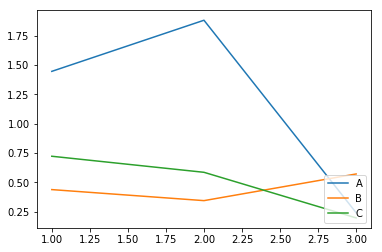

In [130]:

df2 = DataFrame(abs(randn(9)).reshape(3,3),index=[1,2,3],columns=list('ABC'))
print("\n Default Dataframe \n"+str(df2))

plt.plot(df2)
plt.legend(df2.columns,loc="lower right")
plt.savefig('samplepic.png')
plt.show()
